# Исследовательский анализ данных

## Графики и выводы

In [41]:
#2.6
import pandas as pd
data = pd.read_csv ('datasets/visits.csv', sep='\t')
total_visits =data.id.count()
total_stations = len(data.id.unique())
station_visits_per_day = (total_visits / total_stations) / 7
print('Количество заездов:',total_visits)
print('Количество АЗС:',total_stations)
print(data['date_time'].min(),data['date_time'].max())
print('Количество заездов на АЗС в сутки:',station_visits_per_day)
print(data['name'].value_counts().head(10).sort_values(ascending=False))

Количество заездов: 317104
Количество АЗС: 471
20180402T000008 20180408T235957
Количество заездов на АЗС в сутки: 96.17955717318775
Календула      85648
Василек        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: name, dtype: int64


array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

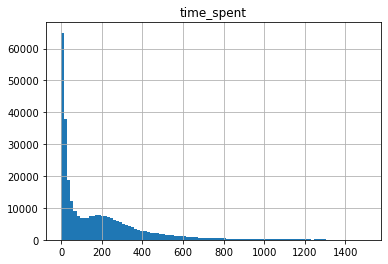

In [42]:
#2.7
import pandas as pd
data = pd.read_csv ('datasets/visits.csv', sep='\t')
data.hist('time_spent',bins=100,range=(0,1500))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

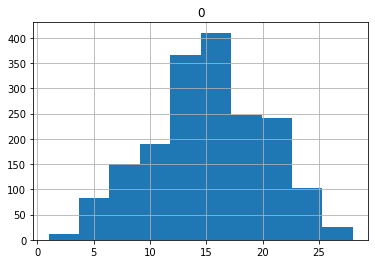

In [43]:
#2.8
import random
import pandas as pd

# Функция, имитирующая время ожидания автобуса.
# (от англ. bus - автобус, wait - ждать, time - время)
def bus_wait_time():
    return random.randint(0, 10)

# Функция, имитирующая время ожидания поезда в метро.
# (от англ. train - поезд, wait - ждать, time - время)
def train_wait_time():
    return random.randint(0, 5)

# Функция подсчёта полного опоздания за день.
# от англ. total - полный, итоговый, delay - задержка, опоздание
def total_delay():
    # обратите внимание, как в Python переносят длинные строки
    return (bus_wait_time() + 
            train_wait_time() + 
            train_wait_time() + 
            bus_wait_time())

# создайте пустой список
days = []

for i in range(365 * 5):
    delay = total_delay()
    days.append(delay)

    # добавьте опоздание в список days
    

# превращаем список в DataFrame
df_days = pd.DataFrame(days)
df_days.hist(bins=10)

# постройте гистограмму для df_days


<AxesSubplot:>

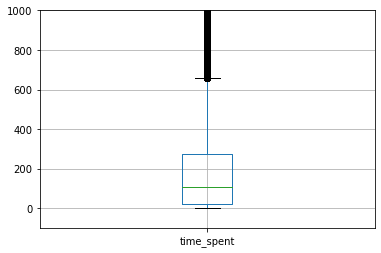

In [44]:
#2.11
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv ('datasets/visits.csv', sep='\t')
plt.ylim(-100,1000)
data.boxplot()

In [45]:
#2.12
import pandas as pd
data = pd.read_csv ('datasets/visits.csv', sep='\t')
print(data.describe())

          time_spent
count  317104.000000
mean      203.382294
std       395.754791
min         0.000000
25%        19.000000
50%       108.000000
75%       274.000000
max     28925.000000


## Срезы данных

3.2.1
Выберите дешёвые авиабилеты — те у которых цена меньше максимальной в полтора раза или ещё ниже.
Выведите на экран полученную выборку.

In [46]:
import pandas as pd

df = pd.DataFrame({
    'From': ['Moscow', 'Moscow', 'St. Petersburg', 'St. Petersburg', 'St. Petersburg'], 
    'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
    'Is_Direct': [False, True, False, False, True],
		'Has_luggage': [True, False, False, True, False],
		'Price': [21032, 19250, 19301, 20168, 31425],
		'Date_From': ['01.07.19', '01.07.19', '04.07.2019', '03.07.2019', '05.07.2019'],
		'Date_To': ['07.07.19', '07.07.19', '10.07.2019', '09.07.2019', '11.07.2019'],
		'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
		'Travel_time_from': [995, 230, 605, 365, 255],
		'Travel_time_to': [350, 225, 720, 355, 250],
})
print(df[df['Price']*1.5 < df['Price'].max()]) # впишите нужное условие

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  


3.2.2
Выберите строки, где значения столбца 'Travel_time_from' больше или равно 365, или значения 'Travel_time_to' меньше 250. Результат выведите на экран.

In [47]:
import pandas as pd

df = pd.DataFrame({
    'From': ['Moscow', 'Moscow', 'St. Petersburg', 'St. Petersburg', 'St. Petersburg'], 
    'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
    'Is_Direct': [False, True, False, False, True],
		'Has_luggage': [True, False, False, True, False],
		'Price': [21032, 19250, 19301, 20168, 31425],
		'Date_From': ['01.07.19', '01.07.19', '04.07.2019', '03.07.2019', '05.07.2019'],
		'Date_To': ['07.07.19', '07.07.19', '10.07.2019', '09.07.2019', '11.07.2019'],
		'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
		'Travel_time_from': [995, 230, 605, 365, 255],
		'Travel_time_to': [350, 225, 720, 355, 250],
})
print(df[(df['Travel_time_from'] >= 365) | (df['Travel_time_to'] < 250)])

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
0          Moscow       Rome      False         True  21032    01.07.19   
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
0    07.07.19  Belavia               995             350  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  


3.2.3
Выберите строки, где:
Полёт с пересадкой;
Возвращение до 8 июля (ни 9, ни 10, ни 11 июля).
Результат выведите на экран.

In [48]:

import pandas as pd

df = pd.DataFrame({
    'From': ['Moscow', 'Moscow', 'St. Petersburg', 'St. Petersburg', 'St. Petersburg'], 
    'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
    'Is_Direct': [False, True, False, False, True],
		'Has_luggage': [True, False, False, True, False],
		'Price': [21032, 19250, 19301, 20168, 31425],
		'Date_From': ['01.07.19', '01.07.19', '04.07.2019', '03.07.2019', '05.07.2019'],
		'Date_To': ['07.07.19', '07.07.19', '10.07.2019', '09.07.2019', '11.07.2019'],
		'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
		'Travel_time_from': [995, 230, 605, 365, 255],
		'Travel_time_to': [350, 225, 720, 355, 250],
})
print(df[(df['Is_Direct']==False)&(~df['Date_To'].isin(('09.07.2019', '10.07.2019', '11.07.2019')))]) # впишите нужное условие

     From    To  Is_Direct  Has_luggage  Price Date_From   Date_To  Airline  \
0  Moscow  Rome      False         True  21032  01.07.19  07.07.19  Belavia   

   Travel_time_from  Travel_time_to  
0               995             350  


3.4.1
Выберите строки, где: Has_luggage равно False и Airline не равно ни S7, ни Rossiya. Напечатайте полученную выборку на экране.

In [49]:
import pandas as pd

df = pd.DataFrame({
    'From': ['Moscow', 'Moscow', 'St. Petersburg', 'St. Petersburg', 'St. Petersburg'], 
    'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
    'Is_Direct': [False, True, False, False, True],
		'Has_luggage': [True, False, False, True, False],
		'Price': [21032, 19250, 19301, 20168, 31425],
		'Date_From': ['01.07.19', '01.07.19', '04.07.2019', '03.07.2019', '05.07.2019'],
		'Date_To': ['07.07.19', '07.07.19', '10.07.2019', '09.07.2019', '11.07.2019'],
		'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
		'Travel_time_from': [995, 230, 605, 365, 255],
		'Travel_time_to': [350, 225, 720, 355, 250],
})
print(df.query("Has_luggage == False and Airline not in ('S7', 'Rossiya')"))

             From    To  Is_Direct  Has_luggage  Price   Date_From  \
2  St. Petersburg  Rome      False        False  19301  04.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
2  10.07.2019  Finnair               605             720  


3.4.2
Выберите строки, где Airline равно "Belavia", "S7" или "Rossiya", при этом 'Travel_time_from' меньше переменной под названием max_time. Напечатайте полученную выборку на экране.

In [50]:
import pandas as pd

df = pd.DataFrame({
    'From': ['Moscow', 'Moscow', 'St. Petersburg', 'St. Petersburg', 'St. Petersburg'], 
    'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
    'Is_Direct': [False, True, False, False, True],
		'Has_luggage': [True, False, False, True, False],
		'Price': [21032, 19250, 19301, 20168, 31425],
		'Date_From': ['01.07.19', '01.07.19', '04.07.2019', '03.07.2019', '05.07.2019'],
		'Date_To': ['07.07.19', '07.07.19', '10.07.2019', '09.07.2019', '11.07.2019'],
		'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
		'Travel_time_from': [995, 230, 605, 365, 255],
		'Travel_time_to': [350, 225, 720, 355, 250],
})
max_time = 300
print(df.query('Airline in ("Belavia", "S7", "Rossiya") and Travel_time_from < @max_time')) # впишите условие создания нужной выборки

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
1          Moscow       Rome       True        False  19250    01.07.19   
4  St. Petersburg  Barcelona       True        False  31425  05.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
1    07.07.19       S7               230             225  
4  11.07.2019  Rossiya               255             250  


3.5.1 Узнайте, на каких АЗС водители проводят больше всего времени. Выведите топ-10 строк с самой долгой заправкой.

In [51]:
import pandas as pd
data = pd.read_csv("datasets/visits.csv", sep="\t")
print(data.sort_values(by=['time_spent'], ascending=False).head(10))

              date_time        id  time_spent      name
114797  20180402T055708  3c1e4c52     28925.0   Василек
27147   20180406T080254  4b5f2af5     28519.0   Немезия
60547   20180408T000002  cf1ba8a5     28292.0   Василек
19042   20180408T204208  5410e876     23696.0   Василек
118597  20180408T165020  3c1e4c52     21184.0   Василек
118058  20180402T111333  3c1e4c52     20359.0   Василек
114406  20180408T083722  3c1e4c52     19886.0   Василек
132164  20180405T160745  627ea5e3     19445.0    Левкой
281360  20180406T180459  d0c0928d     18614.0      Пион
165326  20180402T230204  3af3bb71     18569.0  Агератум


3.5.2 Сохраните срез данных с id == "3c1e4c52" в переменной sample (англ. «выборка, проба»). Выведите количество заездов на эту АЗС.

In [52]:
import pandas as pd
data = pd.read_csv("datasets/visits.csv", sep="\t")
sample=data.query('id == "3c1e4c52"')
print(len(sample))

5814


3.5.3 Посмотрим, как они распределены, отличаются ли от остальных данных. Вспомните, как выглядела гистограмма по всему набору данных.
Постройте гистограмму времён заезда на все АЗС. И аналогичную гистограмму для выбранной АЗС (мы уже сохранили данные в переменную sample). Для обеих гистограмм задайте диапазон 0-1500 секунд и 100 корзин.

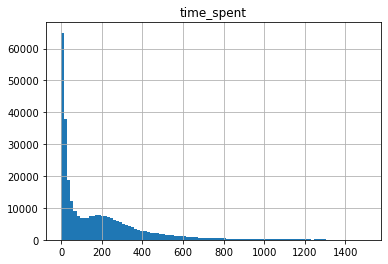

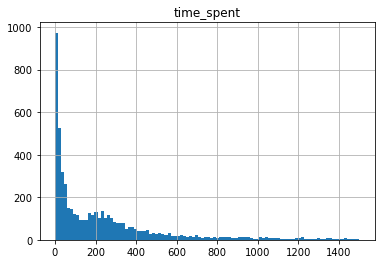

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("datasets/visits.csv", sep="\t")
sample = data.query('id == "3c1e4c52"')
data.hist('time_spent',bins=100,range=(0,1500))
plt.show()
sample.hist('time_spent', bins=100, range=(0,1500))
plt.show()

3.7.1 Переведите значения в столбце 'date_time' в формат даты.
В аргументе format метода to_datetime() передайте строку со значениями года, месяца, дня и времени, чтобы получить запись вида: 2018-04-06T16:53:58. Результат сохраните в столбце 'date_time'.
Первые 5 строк таблицы data выведите на экран.

In [54]:
import pandas as pd
data = pd.read_csv('datasets/visits.csv', sep='\t')
data['date_time'] = pd.to_datetime(data['date_time'],format='%Y-%m-%dT%H:%M:%S')
print (data.head(5))

            date_time        id  time_spent     name
0 2018-04-06 16:53:58  76144fb2        98.0  Василек
1 2018-04-04 17:39:13  76144fb2        15.0  Василек
2 2018-04-03 17:28:24  76144fb2       220.0  Василек
3 2018-04-07 07:04:41  76144fb2        19.0  Василек
4 2018-04-04 13:20:49  76144fb2        14.0  Василек


3.7.2 
Напомним, что в датафрейме записано время UTC. Московское рассчитывают как UTC + 3 часа.
Создайте столбец data['local_time'] и сохраните в нём сдвинутую на +3 часа дату и время из столбца data['date_time']. Напечатайте первые 5 строк таблицы data.

In [55]:
import pandas as pd
data = pd.read_csv('datasets/visits.csv', sep='\t')
data['date_time'] = pd.to_datetime(data['date_time'],format='%Y-%m-%dT%H:%M:%S')
data['local_time'] = data['date_time']+pd.Timedelta(hours=3)
print (data.head(5))

            date_time        id  time_spent     name          local_time
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49


3.7.3
Создайте столбец data['date_hour'] с московским временем заезда на АЗС, округлённым до 1 часа методом dt.round(). Напечатайте первые 5 строк.

In [56]:
import pandas as pd
data = pd.read_csv('datasets/visits.csv', sep='\t')
data['date_time'] = pd.to_datetime(data['date_time'],format='%Y-%m-%dT%H:%M:%S')
data['local_time'] = data['date_time']+pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')
print (data.head(5))

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василек 2018-04-06 19:53:58   
1 2018-04-04 17:39:13  76144fb2        15.0  Василек 2018-04-04 20:39:13   
2 2018-04-03 17:28:24  76144fb2       220.0  Василек 2018-04-03 20:28:24   
3 2018-04-07 07:04:41  76144fb2        19.0  Василек 2018-04-07 10:04:41   
4 2018-04-04 13:20:49  76144fb2        14.0  Василек 2018-04-04 16:20:49   

            date_hour  
0 2018-04-06 20:00:00  
1 2018-04-04 21:00:00  
2 2018-04-03 20:00:00  
3 2018-04-07 10:00:00  
4 2018-04-04 16:00:00  


3.8 Сделайте срез из данных по АЗС с id == "3c1e4c52". Сохраните в переменной sample.
Постройте график зависимости продолжительности заправки от времени заезда. За основу возьмите соответствующие столбцы 'time_spent' и 'local_time'.
Каждый заезд должен выглядеть как отдельная точка, не соединённая линиями с другими точками. Для этого вам потребуется маркер 'o'.
Ограничьте график значениями до 1000 секунд. Нарисуйте линии сетки. Увеличьте размер графика до 12 дюймов по горизонтали и 6 по вертикали.

<AxesSubplot:xlabel='local_time'>

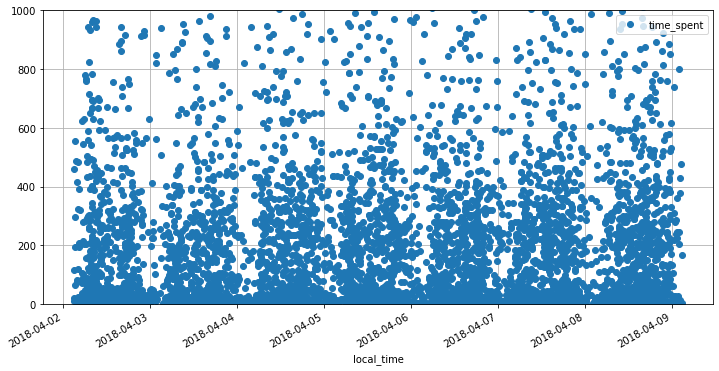

In [57]:
#3.8
import pandas as pd
data = pd.read_csv('datasets/visits.csv', sep='\t')

 
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)
sample=data.query('id == "3c1e4c52"')
sample.plot(x='local_time',y='time_spent', ylim=(0, 1000),style='o', grid=True, figsize=(12, 6))

<AxesSubplot:xlabel='date_hour'>

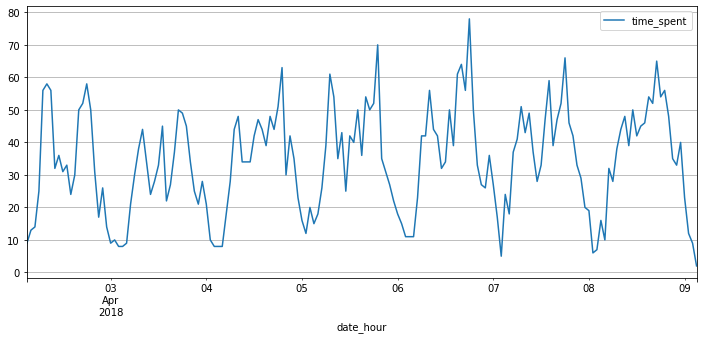

In [58]:
#3.9
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
(data
     .query('id == "3c1e4c52"')
     .pivot_table(index='date_hour', values='time_spent',aggfunc='count')
     .plot(grid=True, figsize=(12, 5))
) 

array([[<AxesSubplot:title={'center':'too_slow'}>]], dtype=object)

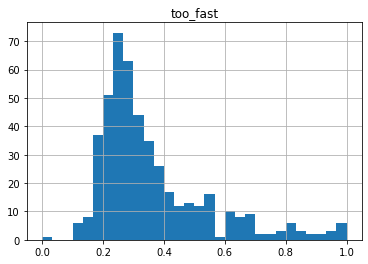

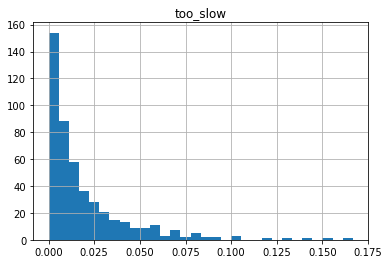

In [59]:
#3.10
import pandas as pd


data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['too_fast'] = data['time_spent'] < 60
too_fast_stat = data.pivot_table(index="id", values="too_fast")
too_fast_stat.hist(bins=30)
data['too_slow'] = data['time_spent'] > 1000
data.pivot_table(index="id", values="too_slow").hist(bins=30)

## Работа с несколькими источниками данных

In [60]:
#4.3
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index="id", values="too_fast")
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index and 60 <= time_spent <= 1000')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stat=good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
print(good_stat.sort_values('time_spent'))

             time_spent
name                   
Белоцветник       154.0
Бальзамин         158.0
Незабудка         161.0
Колокольчик       161.0
Обриета           167.0
Функия            171.5
Гацания           178.5
Аммобиум          180.5
Пион              180.5
Бархатцы          181.5
Мальва            182.0
Ирис              185.0
Арктотис          185.0
Люпин             186.0
Амарант           187.5
Хризантема        188.0
Тюльпан           190.0
Ромашка           191.0
Бегония           195.0
Вербена           199.0
Гейхера           204.0
Вероника          212.0
Левкой            212.5
Подснежник        218.5
Доротеантус       220.0
Диморфотека       224.0
Немезия           226.0
Гвоздика          229.0
Малопа            229.0
Календула         254.0
Крокус            257.5
Василек           264.0
Космос            267.0
Георгина          279.0
Лаватера          282.0
Агератум          309.0
Роза              315.0
Петуния           319.5
Гелихризум        342.0
Астильба        

In [61]:
#4.5
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
   pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index="id", values="too_fast")
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index and 60 <= time_spent <= 1000')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')

stat['good_time_spent']=good_stat['time_spent']
print(stat)

             time_spent  good_time_spent
name                                    
Агератум     337.802721            309.0
Амарант      132.760012            187.5
Аммобиум     256.708042            180.5
Арктотис      73.879984            185.0
Астильба     376.143149            423.0
Бальзамин    134.508411            158.0
Бархатцы     145.300328            181.5
Бегония      163.200647            195.0
Белоцветник  100.818966            154.0
Василек      268.849897            264.0
Вербена      190.016594            199.0
Вероника     220.019402            212.0
Гацания      160.685185            178.5
Гвоздика     294.317308            229.0
Гейхера      167.445947            204.0
Гелихризум   290.138643            342.0
Георгина     166.615555            279.0
Годеция      113.958333              NaN
Диморфотека  406.161017            224.0
Доротеантус  263.568916            220.0
Ирис         179.931159            185.0
Календула    207.357323            254.0
Колокольчик  119

In [62]:
#4.6
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
  pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index="id", values="too_fast")
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index and 60 <= time_spent <= 1000')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']
id_name=good_data.pivot_table(index='id',values='name', aggfunc=['first','count'])
print(id_name.head(5))

                first count
                 name  name
id                         
00ca1b70     Вероника   131
0178ce70      Василек   164
01abf4e9      Гацания    30
030a9067  Колокольчик   228
03740f2d      Василек   157


In [63]:
#4.7
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
  pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index="id", values="too_fast")
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index and 60 <= time_spent <= 1000')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count'] 
print(id_name.head(5))

                 name  count
id                          
00ca1b70     Вероника    131
0178ce70      Василек    164
01abf4e9      Гацания     30
030a9067  Колокольчик    228
03740f2d      Василек    157


In [64]:
#4.8
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], yearfirst=True)
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index="id", values="too_fast")
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index and 60 <= time_spent <= 1000')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat=stat.join(good_stat2)
print(final_stat)

             time_spent  good_time_spent  median_time  stations
name                                                           
Агератум     337.802721            309.0       308.50       3.0
Амарант      132.760012            187.5       169.00       5.0
Аммобиум     256.708042            180.5       178.75       4.0
Арктотис      73.879984            185.0       190.50       3.0
Астильба     376.143149            423.0       435.50       4.0
Бальзамин    134.508411            158.0       158.00       1.0
Бархатцы     145.300328            181.5       181.50       1.0
Бегония      163.200647            195.0       190.00       3.0
Белоцветник  100.818966            154.0       154.00       1.0
Василек      268.849897            264.0       252.00     103.0
Вербена      190.016594            199.0       199.75       6.0
Вероника     220.019402            212.0       223.00       5.0
Гацания      160.685185            178.5       178.50       1.0
Гвоздика     294.317308            229.0

## Взаимосвязь данных

<AxesSubplot:xlabel='count', ylabel='time_spent'>

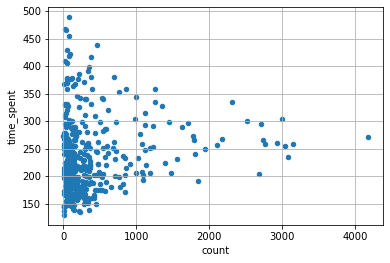

In [65]:
#5.2
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)
station_stat_full.plot(x='count',y='time_spent',kind='scatter',grid=True)

In [66]:
#5.3
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")



stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

print(station_stat_full['count'].corr(station_stat_full['time_spent']))

0.12242632473597156


            time_spent  too_fast  too_slow
time_spent    1.000000 -0.640658  0.802247
too_fast     -0.640658  1.000000 -0.255876
too_slow      0.802247 -0.255876  1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

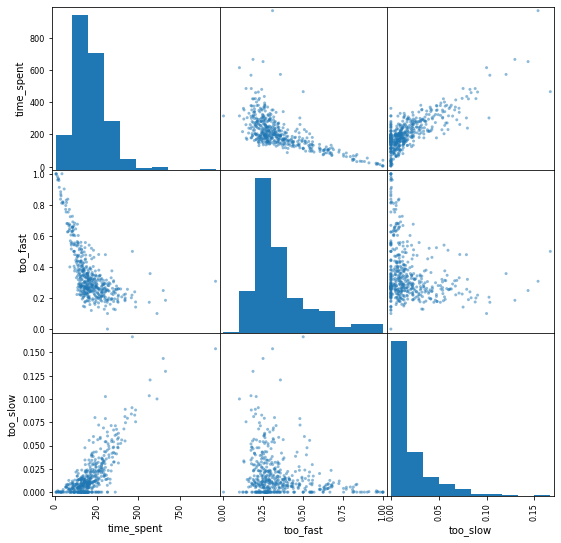

In [67]:
#5.4
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
name_stat['good_time_spent'] = good_name_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)
#print(data.head(5))
station_stat_multi=data.pivot_table(index='id',values=['time_spent','too_fast','too_slow'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi,figsize=(9, 9))

                 time_spent  too_fast  too_slow  good_time_spent
time_spent         1.000000 -0.640658  0.802247         0.702429
too_fast          -0.640658  1.000000 -0.255876        -0.315120
too_slow           0.802247 -0.255876  1.000000         0.445926
good_time_spent    0.702429 -0.315120  0.445926         1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='too_slow'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='good_time_

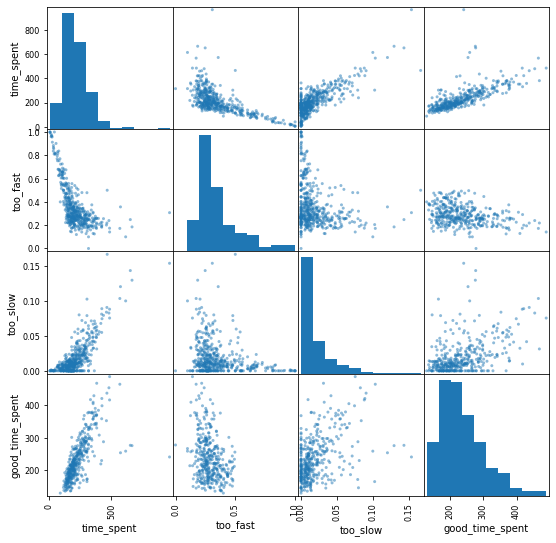

In [68]:
#5.5
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
name_stat['good_time_spent'] = good_name_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

station_stat_multi = data.pivot_table(index='id', values=['time_spent', 'too_fast', 'too_slow'])
station_stat_multi['good_time_spent'] =good_station_stat['time_spent']
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi,figsize=(9,9))

## Валидация результатов

<AxesSubplot:ylabel='count'>

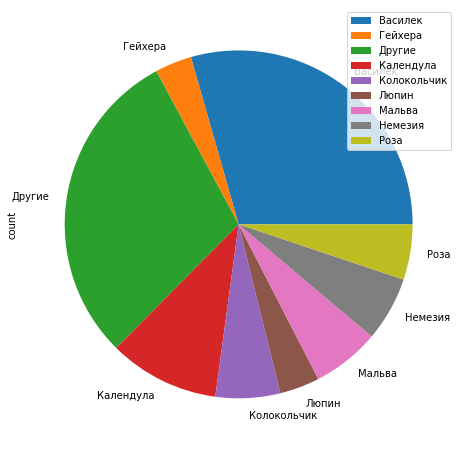

In [69]:
#6.2
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
     pd.to_datetime(data['date_time'], format='%Y-%m-%dT%H:%M:%S')
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
name_stat['good_time_spent'] = good_name_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

big_nets_stat = final_stat.query('stations > 10')
station_stat_full['group_name'] = (
    station_stat_full['name']
    .where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
)

stat_grouped = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
)
stat_grouped.columns = ['time_spent', 'count']



stat_grouped.plot(y='count',kind='pie',figsize=(8,8))
#for group_name, group_data in good_data.groupby('group_name'):
 #   group_data.plot(y='count',kind='pie',figsize=(8,8))

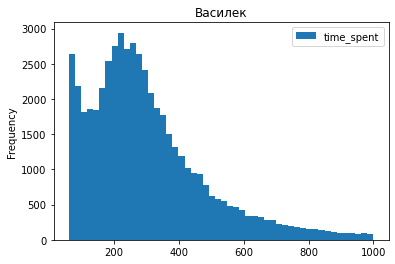

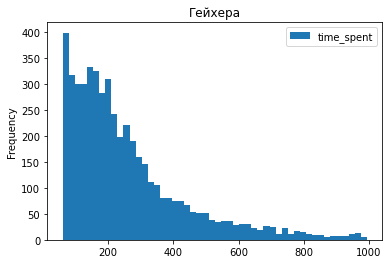

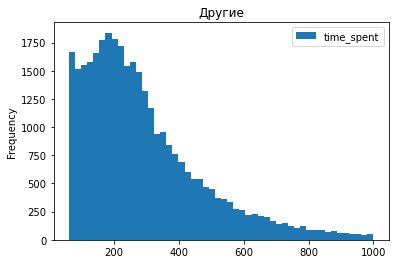

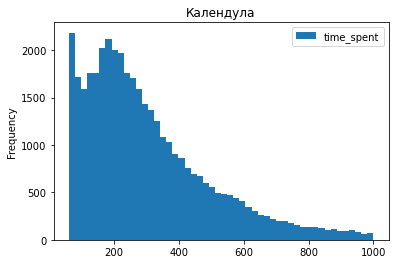

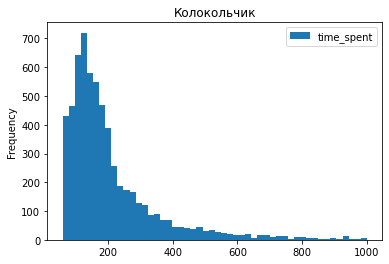

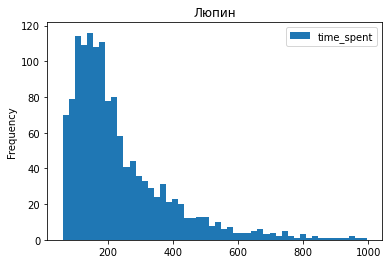

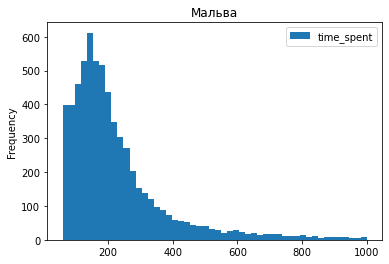

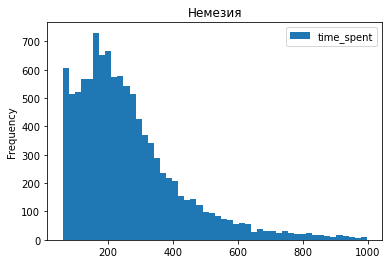

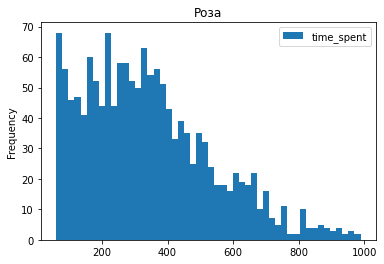

In [70]:
#6.3
import pandas as pd

data = pd.read_csv("datasets/visits.csv", sep="\t")
data['local_time'] = (
    pd.to_datetime(data['date_time'], yearfirst=True)
    + pd.Timedelta(hours=3)
)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

big_nets_stat = final_stat.query('stations > 10')

station_stat_full['group_name'] = (
    station_stat_full['name']
    .where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
)

stat_grouped = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
)
stat_grouped.columns = ['time_spent', 'count']

good_data['group_name'] = (
    good_data['name']
    .where(good_data['name'].isin(big_nets_stat.index), 'Другие')
)

for name, group_data in good_data.groupby('group_name'):
    group_data.plot(kind='hist', y='time_spent', bins=50, title=name)
    